# Project - First Portfolio Project

#### | Introduction |
 The growth of supermarkets in most populated cities are increasing and market competitions are also high. The dataset is one of the historical sales of supermarket company which has recorded in 3 different branches for 3 months data.

In [1]:
#Import all the needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline 
sns.set()

In [2]:
# import the data
market_df = pd.read_csv('supermarket_sales - Sheet1.csv')

In [3]:
# Explore the DataFrame
market_df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


#### - Dictionary
        - Invoice id: 
                Computer generated sales slip invoice identification number. 
        - Branch: 
                Branch of supercenter (3 branches are available identified by A, B and C). 
        - City: 
                 Location of supercenters.
        - Customer type: 
                Type of customers, recorded by Members for customers using member card and Normal for without member card.
        - Gender: 
                Gender type of customer.
        - Product line: 
                General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, 
                Home and lifestyle, Sports and travel. 
        - Unit price: 
                 Price of each product in $.    
        - Quantity: 
               Number of products purchased by customer. 
        - Tax:
               5% tax fee for customer buying.
        - Total:
               Total price including tax.
        - Date:
              Date of purchase (Record available from January 2019 to March 2019).
        - Time:
             Purchase time (10am to 9pm).
        - Payment:
              Payment used by customer for purchase (3 methods are available – Cash, Credit card and Ewallet).
        - COGS:
              Cost of goods sold.
        Gross margin percentage:
               Gross margin percentage.
        Gross income:
                Gross income
        Rating:
              Customer stratification rating on their overall shopping experience (On a scale of 1 to 10).
              



### | Meta Data| 

In [4]:
# general info about the data and its types
market_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [5]:
# How many rows and columns?
market_df.shape

(1000, 17)

In [316]:
# columns names 
market_df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

### | Cleaning |

In [317]:
#is there any null values that needs handling?
market_df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [318]:
# rename  columns 
market_df = market_df.rename(columns={'Invoice ID': 'InvoiceID', 'Customer type': 'CustomerType', 'Product line': 'ProductLine','Unit price':'Unitprice','Tax 5%':'Tax5%','gross margin percentage':'GrossMarginPercentage','Gross Income':'GrossIncome'})

In [319]:
market_df.columns

Index(['InvoiceID', 'Branch', 'City', 'CustomerType', 'Gender', 'ProductLine',
       'Unitprice', 'Quantity', 'Tax5%', 'Total', 'Date', 'Time', 'Payment',
       'cogs', 'GrossMarginPercentage', 'gross income', 'Rating'],
      dtype='object')

In [320]:
# create new column and change data type 
market_df['Purchasing_time'] = market_df['Time'].str[:2]
market_df['Purchasing_time'] = market_df['Purchasing_time'].astype('int8')
market_df = market_df.drop(columns={'Time'})


### | Exploring |

#### | Table Visualization |

In [321]:
market_df.head()

,InvoiceID,Branch,City,CustomerType,Gender,ProductLine,Unitprice,Quantity,Tax5%,Total,Date,Payment,cogs,GrossMarginPercentage,gross income,Rating,Purchasing_time
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,Ewallet,522.83,4.761905,26.1415,9.1,13
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,Cash,76.40,4.761905,3.8200,9.6,10
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,Credit card,324.31,4.761905,16.2155,7.4,13
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,Ewallet,465.76,4.761905,23.2880,8.4,20
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,Ewallet,604.17,4.761905,30.2085,5.3,10


In [322]:
# Print the date of the dataset
print('This dataset is from between',market_df['Date'].min(),'-',market_df['Date'].max())


This dataset is from between 1/1/2019 - 3/9/2019


In [323]:
market_df['Branch'].value_counts()

A    340
B    332
C    328
Name: Branch, dtype: int64

In [324]:
# What is the city have branch 
market_df['City'].value_counts()

Yangon       340
Mandalay     332
Naypyitaw    328
Name: City, dtype: int64

In [325]:
# How many customers have membership?
market_df['CustomerType'].value_counts()

Member    501
Normal    499
Name: CustomerType, dtype: int64

In [326]:
# how many customr for each gender ?
market_df['Gender'].value_counts()

Female    501
Male      499
Name: Gender, dtype: int64

In [327]:
# how many Product Line ?
market_df['ProductLine'].value_counts()

Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: ProductLine, dtype: int64

In [328]:
#What is the highest payment method used?
market_df['Payment'].value_counts()

Ewallet        345
Cash           344
Credit card    311
Name: Payment, dtype: int64

In [329]:
#What is the average for each ProductLine?
df_Product_Line = market_df.groupby('Payment').mean()
df_Product_Line[['Quantity','Total', 'Rating']]

,Quantity,Total,Rating
Payment,,,
Cash,5.511628,326.181890,6.970058
Credit card,5.536977,324.009878,7.003215
Ewallet,5.484058,318.820600,6.947826


In [330]:
#What is the average for each ProductLine?
df_Product_Line = market_df.groupby('ProductLine').mean()
df_Product_Line[['Quantity','Total', 'Rating']]

,Quantity,Total,Rating
ProductLine,,,
Electronic accessories,5.711765,319.632538,6.924706
Fashion accessories,5.067416,305.089298,7.029213
Food and beverages,5.471264,322.671517,7.113218
Health and beauty,5.618421,323.643020,7.003289
Home and lifestyle,5.693750,336.636956,6.837500
Sports and travel,5.542169,332.065220,6.916265


In [331]:
# Highest invoice sold 
market_df[market_df["Total"]==market_df.Total.max()]

,InvoiceID,Branch,City,CustomerType,Gender,ProductLine,Unitprice,Quantity,Tax5%,Total,Date,Payment,cogs,GrossMarginPercentage,gross income,Rating,Purchasing_time
350,860-79-0874,C,Naypyitaw,Member,Female,Fashion accessories,99.3,10,49.65,1042.65,2/15/2019,Credit card,993.0,4.761905,49.65,6.6,14


In [332]:
# lowest invoice sold 
market_df[market_df["Total"]==market_df.Total.min()]

,InvoiceID,Branch,City,CustomerType,Gender,ProductLine,Unitprice,Quantity,Tax5%,Total,Date,Payment,cogs,GrossMarginPercentage,gross income,Rating,Purchasing_time
822,784-21-9238,C,Naypyitaw,Member,Male,Sports and travel,10.17,1,0.5085,10.6785,2/7/2019,Cash,10.17,4.761905,0.5085,5.9,14


In [333]:
# Highest Invoice sold
Total_price = market_df.sort_values("Total", ascending = False)
Total_price.head(10)

,InvoiceID,Branch,City,CustomerType,Gender,ProductLine,Unitprice,Quantity,Tax5%,Total,Date,Payment,cogs,GrossMarginPercentage,gross income,Rating,Purchasing_time
350,860-79-0874,C,Naypyitaw,Member,Female,Fashion accessories,99.30,10,49.650,1042.650,2/15/2019,Credit card,993.0,4.761905,49.650,6.6,14
167,687-47-8271,A,Yangon,Normal,Male,Fashion accessories,98.98,10,49.490,1039.290,2/8/2019,Credit card,989.8,4.761905,49.490,8.7,16
557,283-26-5248,C,Naypyitaw,Member,Female,Food and beverages,98.52,10,49.260,1034.460,1/30/2019,Ewallet,985.2,4.761905,49.260,4.5,20
699,751-41-9720,C,Naypyitaw,Normal,Male,Home and lifestyle,97.50,10,48.750,1023.750,1/12/2019,Ewallet,975.0,4.761905,48.750,8.0,16
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.690,1022.490,3/2/2019,Ewallet,973.8,4.761905,48.690,4.4,17
792,744-16-7898,B,Mandalay,Normal,Female,Home and lifestyle,97.37,10,48.685,1022.385,1/15/2019,Credit card,973.7,4.761905,48.685,4.9,13
422,271-88-8734,C,Naypyitaw,Member,Female,Fashion accessories,97.21,10,48.605,1020.705,2/8/2019,Credit card,972.1,4.761905,48.605,8.7,13
166,234-65-2137,C,Naypyitaw,Normal,Male,Home and lifestyle,95.58,10,47.790,1003.590,1/16/2019,Cash,955.8,4.761905,47.790,4.8,13
357,554-42-2417,C,Naypyitaw,Normal,Female,Sports and travel,95.44,10,47.720,1002.120,1/9/2019,Cash,954.4,4.761905,47.720,5.2,13
429,325-77-6186,A,Yangon,Member,Female,Home and lifestyle,90.65,10,45.325,951.825,3/8/2019,Ewallet,906.5,4.761905,45.325,7.3,10


In [334]:
# Highest Rating
rating = market_df.sort_values("Rating", ascending = False)
rating.head(10)

,InvoiceID,Branch,City,CustomerType,Gender,ProductLine,Unitprice,Quantity,Tax5%,Total,Date,Payment,cogs,GrossMarginPercentage,gross income,Rating,Purchasing_time
387,725-56-0833,A,Yangon,Normal,Female,Health and beauty,32.32,10,16.1600,339.3600,2/20/2019,Credit card,323.20,4.761905,16.1600,10.0,16
159,423-57-2993,B,Mandalay,Normal,Male,Sports and travel,93.39,6,28.0170,588.3570,3/27/2019,Ewallet,560.34,4.761905,28.0170,10.0,19
853,866-70-2814,B,Mandalay,Normal,Female,Electronic accessories,52.79,10,26.3950,554.2950,2/25/2019,Ewallet,527.90,4.761905,26.3950,10.0,11
62,347-34-2234,B,Mandalay,Member,Female,Sports and travel,55.07,9,24.7815,520.4115,2/3/2019,Ewallet,495.63,4.761905,24.7815,10.0,13
60,285-68-5083,C,Naypyitaw,Member,Female,Sports and travel,24.74,3,3.7110,77.9310,2/15/2019,Credit card,74.22,4.761905,3.7110,10.0,17
382,868-52-7573,B,Mandalay,Normal,Female,Food and beverages,99.69,5,24.9225,523.3725,1/14/2019,Cash,498.45,4.761905,24.9225,9.9,12
194,831-07-6050,A,Yangon,Normal,Male,Electronic accessories,32.71,5,8.1775,171.7275,3/19/2019,Credit card,163.55,4.761905,8.1775,9.9,11
179,342-65-4817,C,Naypyitaw,Member,Male,Health and beauty,86.80,3,13.0200,273.4200,1/28/2019,Ewallet,260.40,4.761905,13.0200,9.9,16
86,362-58-8315,C,Naypyitaw,Normal,Male,Fashion accessories,76.52,5,19.1300,401.7300,3/25/2019,Cash,382.60,4.761905,19.1300,9.9,10
23,636-48-8204,A,Yangon,Normal,Male,Electronic accessories,34.56,5,8.6400,181.4400,2/17/2019,Ewallet,172.80,4.761905,8.6400,9.9,11


In [335]:
# Data grouped by City, CustomerType,Gender and the sum of Quantity for each city
(market_df.groupby(["City","CustomerType",'Gender'])["Quantity"].sum()).to_frame() 

Quantity
City      CustomerType Gender          
Mandalay  Member       Female       479
                       Male         445
          Normal       Female       432
                       Male         464
Naypyitaw Member       Female       548
                       Male         349
          Normal       Female       501
                       Male         433
Yangon    Member       Female       465
                       Male         499
          Normal       Female       444
                       Male         451

In [336]:
# Data grouped by City, ProductLine and the sum of Quantity for each city
(market_df.groupby(["City","ProductLine"])["Quantity"].sum()).to_frame() 

Quantity
City      ProductLine                     
Mandalay  Electronic accessories       316
          Fashion accessories          297
          Food and beverages           270
          Health and beauty            320
          Home and lifestyle           295
          Sports and travel            322
Naypyitaw Electronic accessories       333
          Fashion accessories          342
          Food and beverages           369
          Health and beauty            277
          Home and lifestyle           245
          Sports and travel            265
Yangon    Electronic accessories       322
          Fashion accessories          263
          Food and beverages           313
          Health and beauty            257
          Home and lifestyle           371
          Sports and travel            333

In [337]:
# Show total sales for each city
(market_df.groupby(["City"])["Total"].sum()).to_frame() 

,Total
City,
Mandalay,106197.6720
Naypyitaw,110568.7065
Yangon,106200.3705


#### | Charts Visulaization |

Text(0.5, 1.0, 'Number of customers by gender in each branch')

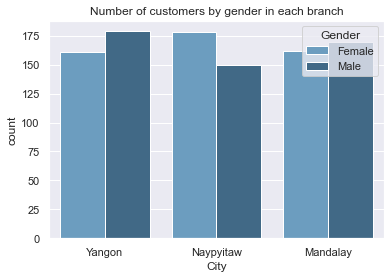

In [338]:
# Number of customers by gender in each branch
sns.countplot(x='City', hue='Gender',data=market_df,palette="Blues_d").set_title("Number of customers by gender in each branch")

<AxesSubplot:xlabel='City', ylabel='Total'>

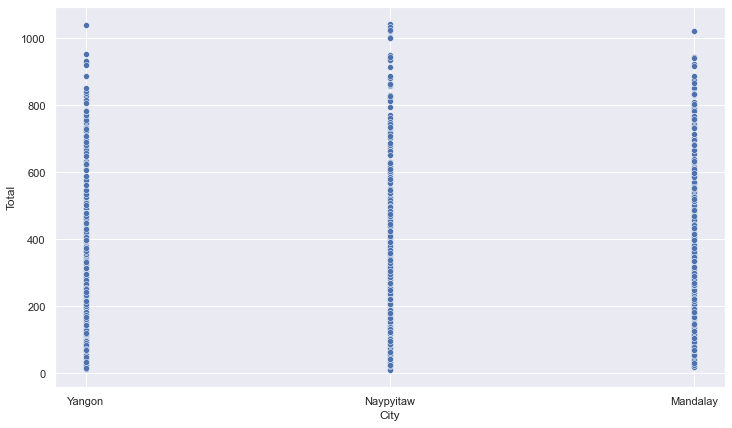

In [339]:
# Show total sales for each city
plt.figure(figsize=(12, 7))
sns.scatterplot(x='City',y='Total',data=market_df,palette='winter')

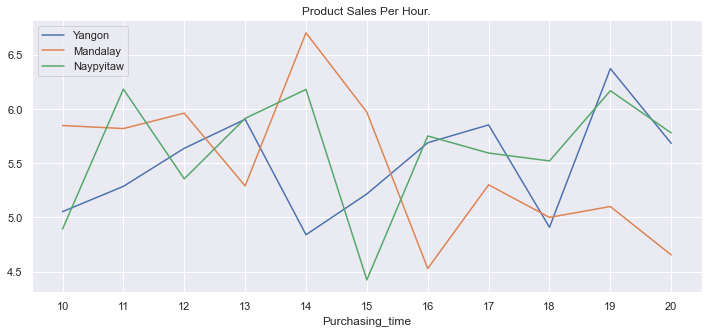

In [340]:
plt.figure(figsize=(12,5))
market_df[market_df['City']=='Yangon'].groupby(['Purchasing_time'])['Quantity'].mean().plot()
market_df[market_df['City']=='Mandalay'].groupby(['Purchasing_time'])['Quantity'].mean().plot()
market_df[market_df['City']=='Naypyitaw'].groupby(['Purchasing_time'])['Quantity'].mean().plot()
plt.xticks(np.arange(10, 21, step=1))
#plt.yticks(np.arange(0, 500, step=50))
plt.legend(['Yangon','Mandalay','Naypyitaw'])
plt.title('Product Sales Per Hour.')
plt.show()

The growth of supermarkets in most populated cities are increasing and market competitions are also high. The dataset is one of the historical sales of supermarket company which has recorded in 3 different branches for 3 months data. Predictive data analytics methods are easy to apply with this dataset.


Text(0.5, 1.0, 'The Highest raring by City ')

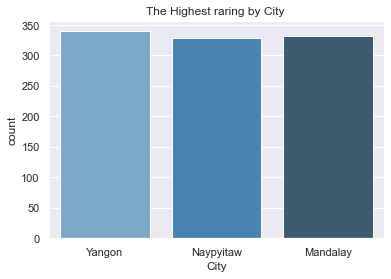

In [341]:
# The Highest raring by City 
sns.countplot(x="City", data=market_df, palette="Blues_d").set_title("The Highest raring by City ") 

### Summary and Conclusions
- It can be seen that customers use e-wallets a lot
- It can be seen that the best product rating is Food and beverages	
- The best branch is Yangon

 - https://www.kaggle.com/rafliaping/supermarket-eda
 - https://www.kaggle.com/aungpyaeap/supermarket-sales
 